<a href="https://colab.research.google.com/github/rafael100495/Aulas_Mackenzie/blob/main/BIG_A5_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 5** 
## CASO: Clustering, Segmentando Países pela Força de Trabalho 
---
<br>
<br>





A partir deste notebook você vai criar modelos de clusterização para os países com base em suas características de força de trabalho. 

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. 

# Basic imports

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploração dos Dados



Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979. 

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/ 

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando Clusterização.

In [207]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [208]:
descricao = df.describe()
moda = df.mode()
print(descricao)
print('=======#======= MODA =======#=======')
print(moda)
print('=======#======= QTD. DE DADOS NULOS =======#=======')
print(df.isna().sum())
print('=======#======= HEAD =======#=======')
print(df.head)
#para inspecionar, gosto de utilizar o describe, pois ele nos tras a contagem, media, minimo, máximo, quantis e etc.
#também consigo visualizar que as colunas B, C e D possuem dados nulos.

             Agr        Min        Man         PS        Con         SI  \
count  26.000000  26.000000  26.000000  26.000000  26.000000  26.000000   
mean   19.130769   1.253846  27.007692   0.907692   8.165385  12.957692   
std    15.546569   0.970044   7.007763   0.376216   1.645586   4.575253   
min     2.700000   0.100000   7.900000   0.100000   2.800000   5.200000   
25%     7.700000   0.525000  23.000000   0.600000   7.525000   9.250000   
50%    14.450000   0.950000  27.550000   0.850000   8.350000  14.400000   
75%    23.675000   1.800000  30.200000   1.175000   8.975000  16.875000   
max    66.800000   3.100000  41.200000   1.900000  11.500000  19.100000   

             Fin        SPS         TC  
count  26.000000  26.000000  26.000000  
mean    4.000000  20.023077   6.546154  
std     2.806564   6.829542   1.391469  
min     0.500000   5.300000   3.200000  
25%     1.225000  16.250000   5.700000  
50%     4.650000  19.650000   6.700000  
75%     5.925000  24.125000   7.07500

## Preparação dos dados

Normalize os dados o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.

In [211]:
from sklearn.preprocessing import StandardScaler
df = df.drop(columns=['Country'])

scaler = StandardScaler() 
scaler.fit(df)
X = scaler.transform(df)
X[0:10]

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507],
       [-0.21192785, -0.68738647,  0.08619551, -1.10512639,  1.13694923,
         1.14619796, -0.87207332,  0.01148634, -0.62014411],
       [-0.74982093,  1.94085592,  0.55187516, -0.29192018,  0.64117263,
         1.23535621,  0.21801833, -0.12290385, -0.25369532],
       [-0.84165634, -1.21303495, -0.65598143,  0.2502173 ,  1

## Número de Clusters

(Moodle) **Q1**. Qual o melhor número de clusters pela *regra do cotovelo* e pelo valor médio de silhueta aplicanaod o `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.   



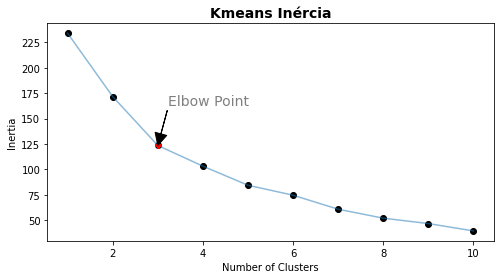

In [212]:
from sklearn.cluster import KMeans

def inercia(X=X, kmin=2, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1234)
      clf.fit(X)
      inertia.append(clf.inertia_)
      
  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(1 , 11) , inertia , 'ko')
  plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,1,10)
# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (3 , inertia[2]), 
            xytext=(10, 40), fontsize=14,
            textcoords='offset points', 
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()


In [213]:
from sklearn import metrics

for n_clusters in range(2,10):
  clf = KMeans(n_clusters = n_clusters, random_state = 1234)
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters, 'clusters: ', np.round(metrics.silhouette_score(X, labels, metric='euclidean'),3))


Silhueta média para 2 clusters:  0.323
Silhueta média para 3 clusters:  0.278
Silhueta média para 4 clusters:  0.231
Silhueta média para 5 clusters:  0.202
Silhueta média para 6 clusters:  0.164
Silhueta média para 7 clusters:  0.2
Silhueta média para 8 clusters:  0.194
Silhueta média para 9 clusters:  0.182


(Moodle) **Q2**. Qual ao valor médio de silhueta para o melhor número de clusters na clusterização hierárquica (aglomerativa) para os esquemas de ligação (*linkage*) `ward` (padrão do `scikit-learn`),`complete` e `single`? (verifique de 2 a 10 clusters)

> Não empregue outros parâmetros não solicitados. 

O melhor valor para o número de clusters é o 3.



In [214]:
from sklearn.cluster import AgglomerativeClustering

#Esquema de ligação Ward - Padrão do Scikit-Learn

ward2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 
ward3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') 
ward4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward') 
ward5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward') 
ward6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward') 
ward7 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward') 
ward8 = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward') 
ward9 = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward') 
ward10 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward') 

ward2.fit(X)
ward3.fit(X)
ward4.fit(X)
ward5.fit(X)
ward6.fit(X)
ward7.fit(X)
ward8.fit(X)
ward9.fit(X)
ward10.fit(X)

#Esquema de ligação Complete

complete2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
complete3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
complete4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
complete5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
complete6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='complete')
complete7 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='complete')
complete8 = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='complete')
complete9 = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='complete')
complete10 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')

complete2.fit(X)
complete3.fit(X)
complete4.fit(X)
complete5.fit(X)
complete6.fit(X)
complete7.fit(X)
complete8.fit(X)
complete9.fit(X)
complete10.fit(X)


#Esquema de ligação Single

single2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single') 
single3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single') 
single4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single') 
single5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single') 
single6 = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single') 
single7 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='single') 
single8 = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='single') 
single9 = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='single') 
single10 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='single') 

single2.fit(X)
single3.fit(X)
single4.fit(X)
single5.fit(X)
single6.fit(X)
single7.fit(X)
single8.fit(X)
single9.fit(X)
single10.fit(X)


# Resultados

labelsw2 = ward2.labels_
labelsw3 = ward3.labels_
labelsw4 = ward4.labels_
labelsw5 = ward5.labels_
labelsw6 = ward6.labels_
labelsw7 = ward7.labels_
labelsw8 = ward8.labels_
labelsw9 = ward9.labels_
labelsw10 = ward10.labels_

labelsc2 = complete2.labels_
labelsc3 = complete3.labels_
labelsc4 = complete4.labels_
labelsc5 = complete5.labels_
labelsc6 = complete6.labels_
labelsc7 = complete7.labels_
labelsc8 = complete8.labels_
labelsc9 = complete9.labels_
labelsc10 = complete10.labels_

labelss2 = single2.labels_
labelss3 = single3.labels_
labelss4 = single4.labels_
labelss5 = single5.labels_
labelss6 = single6.labels_
labelss7 = single7.labels_
labelss8 = single8.labels_
labelss9 = single9.labels_
labelss10 = single10.labels_


print(" Ward com 2 Clusters :", labelsw2, "\n Ward com 3 Clusters :", labelsw3,"\n Ward com 4 Clusters :", labelsw4,"\n Ward com 5 Clusters :", labelsw5,"\n Ward com 6 Clusters :", labelsw6,"\n Ward com 7 Clusters :", labelsw7,"\n Ward com 8 Clusters :", labelsw8,"\n Ward com 9 Clusters :", labelsw9,"\n Ward com 10 Clusters :", labelsw10, "\n","\n")      
print(" Complete com 2 Clusters :", labelsc2, "\n Complete com 3 Clusters :", labelsc3,"\n Complete com 4 Clusters :", labelsc4,"\n Complete com 5 Clusters :", labelsc5,"\n Complete com 6 Clusters :", labelsc6,"\n Complete com 7 Clusters :", labelsc7,"\n Complete com 8 Clusters :", labelsc8,"\n Complete com 9 Clusters :", labelsc9,"\n Complete com 10 Clusters :", labelsc10, "\n","\n")      
print(" Single com 2 Clusters :", labelss2, "\n Single com 3 Clusters :", labelss3,"\n Single com 4 Clusters :", labelss4,"\n Single com 5 Clusters :", labelss5,"\n Single com 6 Clusters :", labelss6,"\n Single com 7 Clusters :", labelss7,"\n Single com 8 Clusters :", labelss8,"\n Single com 9 Clusters :", labelss9,"\n Single com 10 Clusters :", labelss10, "\n","\n")

 Ward com 2 Clusters : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1] 
 Ward com 3 Clusters : [2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 1 0 0 0 0 0 0 0 1] 
 Ward com 4 Clusters : [2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 0 1 3 3 3 1 1 1 0] 
 Ward com 5 Clusters : [0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 4 1 3 3 3 1 1 1 2] 
 Ward com 6 Clusters : [1 1 1 2 1 2 2 1 1 1 1 0 1 0 0 1 2 4 0 3 3 3 0 0 0 5] 
 Ward com 7 Clusters : [0 0 0 6 0 6 6 0 0 0 0 1 0 1 1 0 6 4 2 3 3 3 2 2 2 5] 
 Ward com 8 Clusters : [1 1 1 6 7 6 6 1 7 7 7 0 1 0 0 1 6 4 2 3 3 3 2 2 2 5] 
 Ward com 9 Clusters : [1 1 1 2 7 2 2 1 7 7 7 6 1 6 8 1 2 4 0 3 3 3 0 0 0 5] 
 Ward com 10 Clusters : [1 1 1 0 7 0 0 1 7 7 7 6 1 6 8 1 0 9 2 3 3 3 2 2 4 5] 
 

 Complete com 2 Clusters : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1] 
 Complete com 3 Clusters : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 2 0 0 0 1] 
 Complete com 4 Clusters : [3 3 3 1 3 1 1 3 3 3 3 1 3 1 1 3 1 0 1 2 2 2 1 1 1 0] 
 Complete com 5 Clusters : [1 1 1 0 1 0 0 1 1 1 

In [215]:
df['Cluster'] = labelsw3
df.head()

df.groupby('Cluster').mean()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Cluster,,,,,,,,,
0,24.760000,1.85,29.080000,0.900000,8.670000,9.180000,2.000000,16.630000,6.92
1,57.750000,1.10,12.350000,0.600000,3.850000,5.800000,6.200000,8.600000,3.60
2,9.592857,0.85,27.621429,0.957143,8.421429,16.678571,5.114286,24.078571,6.70


IndexError: ignored

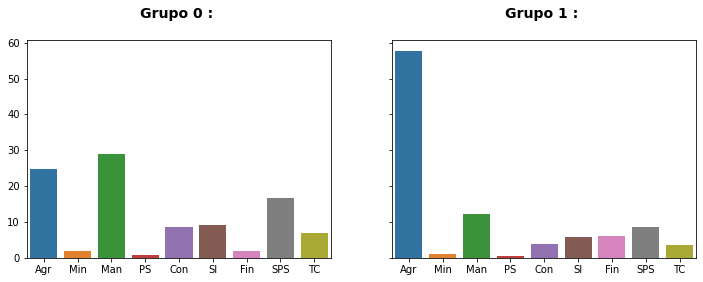

In [216]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,2,figsize=(12,4),sharey=True)


for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n', fontsize=14, weight='bold')

plt.show()

## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Métodos não supervisionados são analíticos e é esperado que você analise as mátricas e resultados para uma *solução*. 

(Moodle) **Q3**. Verifique a *distribuição* da quantidade de elementos no modelo que fornece o melhor número de silhueta. Qual é essa distribuição e responda se essa é uma clusterização útil e adequada.

> Note, por exemplo a distribuição de 100, 43, 8 para 3 grupos é uma distribuição melhor que 100, 50, 1 e podemos considerar neste último caso que o grupo com 1 elemento é um *outlier*.



Após verificar a quantidade de elementos, o melhor resultado foi obtido através do Ward (Padrão), porém, mesmo assim, existem clusters que possuem mais força por exemplo que outros. 

## Clusterização `Kmeans`,  $K=3$.

Vamos considerar que nossa análise ao final leva ao uso do Kmeans para 3 grupos de dados. De fato essa parece ser a melhor opção embora não tenhamos explorado isso aqui. Verique que a distribuição dos dados é de fato melhor e analise para esse modelo os valores médios dos grupos e os países pertencentes a cada grupo.

(Moodle) **Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele? 

(Moodle) **Q5**. Excetuando o grupo o com % médio maior da força de trabalho empregada na agricultura e esse indicador, o que mais se destaca em diferenciar os outros dois grupos?

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.



In [220]:
from sklearn.preprocessing import StandardScaler

# Configura e instancia o estimador 
clf = KMeans(n_clusters = 3 , random_state= 1234)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 2 2 2 2 2 2 2 0]
[[ 2.17579264 -0.33695415 -1.87839051 -0.83405766 -1.79639567 -1.17191669
   0.33913963 -1.58626377 -1.40190152]
 [-0.49645361 -0.46398587  0.06891443  0.02997395  0.27708668  0.68508261
   0.42695257  0.42212305  0.01198006]
 [ 0.20226856  1.20494805  0.6475058   0.2889414   0.13654287 -1.06365309
  -1.12123713 -0.28502536  0.57343195]]


In [221]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df['Cluster'] = labels
print(df.head())

      Country   Agr  Min   Man   PS  Con    SI  Fin   SPS   TC  Cluster
0     Belgium   3.3  0.9  27.6  0.9  8.2  19.1  6.2  26.6  7.2        1
1     Denmark   9.2  0.1  21.8  0.6  8.3  14.6  6.5  32.2  7.1        1
2      France  10.8  0.8  27.5  0.9  8.9  16.8  6.0  22.6  5.7        1
3  W. Germany   6.7  1.3  35.8  0.9  7.3  14.4  5.0  22.3  6.1        1
4     Ireland  23.2  1.0  20.7  1.3  7.5  16.8  2.8  20.8  6.1        1


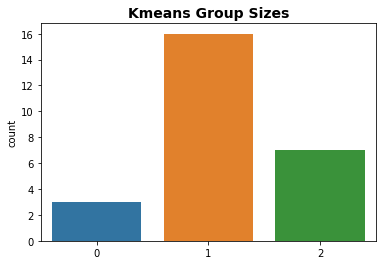

In [222]:
sns.countplot(x=labels)
plt.title('Kmeans Group Sizes', fontsize=14, weight='bold')
plt.show()

In [225]:
df.groupby('Cluster').mean()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Cluster,,,,,,,,,
0,52.300000,0.933333,14.100000,0.600000,5.266667,7.700000,4.933333,9.400000,4.633333
1,11.562500,0.812500,27.481250,0.918750,8.612500,16.031250,5.175000,22.850000,6.562500
2,22.214286,2.400000,31.457143,1.014286,8.385714,8.185714,0.914286,18.114286,7.328571


In [226]:
scaler.inverse_transform(centroids)

array([[52.3       ,  0.93333333, 14.1       ,  0.6       ,  5.26666667,
         7.7       ,  4.93333333,  9.4       ,  4.63333333],
       [11.5625    ,  0.8125    , 27.48125   ,  0.91875   ,  8.6125    ,
        16.03125   ,  5.175     , 22.85      ,  6.5625    ],
       [22.21428571,  2.4       , 31.45714286,  1.01428571,  8.38571429,
         8.18571429,  0.91428571, 18.11428571,  7.32857143]])

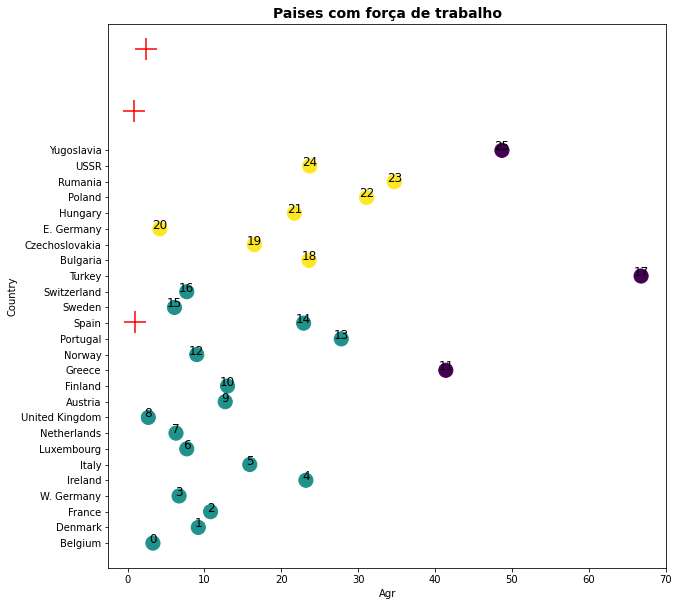

In [230]:
f = plt.figure(figsize=(10,10))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter( x = 'Agr' ,y = 'Country' , data = df , c = df.Cluster , s = 200 )
plt.scatter(x = real_centroids[: , 1] , y =  real_centroids[: , 2] , s = 500 , c = 'red' ,  marker='+')

for line in range(0,df.shape[0]):
     plt.text(df.Agr[line], df.Country[line], df.index[line], 
              horizontalalignment='center', 
              size='large', 
              color='black')
     
plt.title('Paises com força de trabalho', fontsize=14, weight='bold')
plt.ylabel('Country') , plt.xlabel('Agr')
plt.show()

Estes são os 3 clusters de países infromando a sua força. O que é possível notarmos, que no cluster 2 a media da força é maior, e são países frios.